# Iris clustering using k-means

Let's play initialy only with the sepal features

- Load the database

In [1]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2] # use only 'sepal length and sepal width'
y_iris = iris.target

- Lets plot the distribution

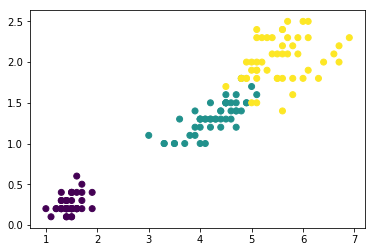

In [25]:
plt.scatter(X[:, 0], X[:, 1], c=y_iris)

- Now, create the KMeans cluster with 2, 3 and 4 centroids, fit the data and then plot the results

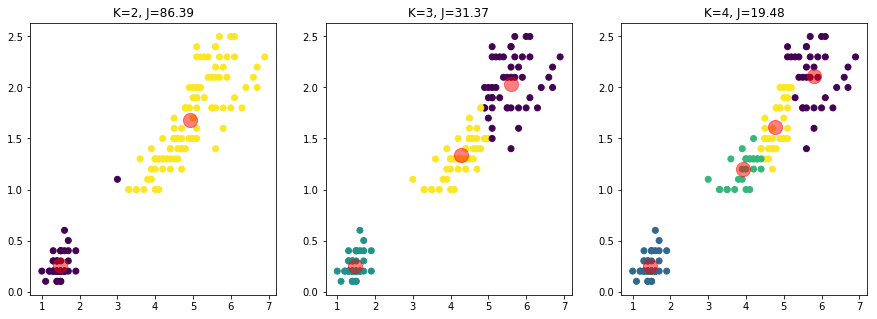

In [30]:
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)
c2 = km2.cluster_centers_
plt.scatter(c2[:, 0], c2[:, 1], c='red', s=200, alpha=0.5);

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
c3 = km3.cluster_centers_
plt.scatter(c3[:, 0], c3[:, 1], c='red', s=200, alpha=0.5);

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)
c4 = km4.cluster_centers_
plt.scatter(c4[:, 0], c4[:, 1], c='red', s=200, alpha=0.5);

- Now, try to find the best K using Elbown Curve

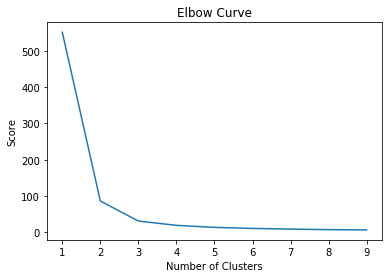

In [22]:
import numpy as np
X = iris.data[:, 2:4] # use only 'petal length and sepal width'
y_iris = iris.target


k = range(1, 10)
kmeans = [cluster.KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

plt.plot(k,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()


It seems that the best bet is between 3 and 4.

No great improvement after 5.

**Note that we considered we do not know the target classes.**